# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [2]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [3]:
tf.reset_default_graph()

In [15]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 2  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

# Train the agent

In [16]:
from sgm.trainer import train_eval

train_eval(agent,
           tf_env,
           eval_tf_env,
           initial_collect_steps=1000,
           eval_interval=1000,
           num_eval_episodes=10,
           num_iterations=10000,
           save_model_dir=model_dir,
           experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Saving checkpoints to directory D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  0%|                                                                              | 1/10000 [00:01<3:55:25,  1.41s/it]

INFO:tensorflow:step = 30000, loss = 2.995294
INFO:tensorflow:651.283 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.70
INFO:tensorflow:		 predicted_dist = 10.5 (0.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -19.20
INFO:tensorflow:		 predicted_dist = 10.5 (0.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 10.5 (0.0)
INFO:tensorflow:	 eval_time = 1.40


 10%|███████▋                                                                     | 992/10000 [00:07<00:37, 242.52it/s]

Saved checkpoint for step 1000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-1
INFO:tensorflow:step = 31000, loss = 2.237185
INFO:tensorflow:263.398 steps/sec
INFO:tensorflow:step = 31000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.70
INFO:tensorflow:		 predicted_dist = 14.5 (0.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.6 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.8 (0.2)
INFO:tensorflow:	 eval_time = 0.95


 20%|███████████████                                                             | 1985/10000 [00:12<00:33, 236.92it/s]

Saved checkpoint for step 2000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-2
INFO:tensorflow:step = 32000, loss = 1.792008
INFO:tensorflow:255.047 steps/sec
INFO:tensorflow:step = 32000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.30
INFO:tensorflow:		 predicted_dist = 13.8 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.90
INFO:tensorflow:		 predicted_dist = 16.7 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 18.3 (0.5)
INFO:tensorflow:	 eval_time = 0.89


 30%|██████████████████████▋                                                     | 2992/10000 [00:17<00:31, 222.13it/s]

Saved checkpoint for step 3000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-3
INFO:tensorflow:step = 33000, loss = 2.235924
INFO:tensorflow:243.551 steps/sec
INFO:tensorflow:step = 33000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.00
INFO:tensorflow:		 predicted_dist = 11.6 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.50
INFO:tensorflow:		 predicted_dist = 15.6 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 17.6 (0.9)
INFO:tensorflow:	 eval_time = 0.84


 40%|██████████████████████████████▍                                             | 3999/10000 [00:23<00:28, 206.94it/s]

Saved checkpoint for step 4000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-4
INFO:tensorflow:step = 34000, loss = 2.502637
INFO:tensorflow:251.811 steps/sec
INFO:tensorflow:step = 34000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.70
INFO:tensorflow:		 predicted_dist = 8.6 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 13.6 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.90
INFO:tensorflow:		 predicted_dist = 17.2 (0.8)
INFO:tensorflow:	 eval_time = 0.77


 50%|█████████████████████████████████████▉                                      | 4994/10000 [00:28<00:21, 227.55it/s]

Saved checkpoint for step 5000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-5
INFO:tensorflow:step = 35000, loss = 3.308675
INFO:tensorflow:246.679 steps/sec
INFO:tensorflow:step = 35000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 8.5 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 11.2 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.70
INFO:tensorflow:		 predicted_dist = 15.4 (1.5)
INFO:tensorflow:	 eval_time = 0.75


 60%|█████████████████████████████████████████████▌                              | 5989/10000 [00:33<00:17, 226.21it/s]

Saved checkpoint for step 6000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-6
INFO:tensorflow:step = 36000, loss = 2.826274
INFO:tensorflow:247.350 steps/sec
INFO:tensorflow:step = 36000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 5.6 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.50
INFO:tensorflow:		 predicted_dist = 11.2 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 16.6 (0.9)
INFO:tensorflow:	 eval_time = 0.75


 70%|█████████████████████████████████████████████████████▏                      | 6998/10000 [00:38<00:13, 220.83it/s]

Saved checkpoint for step 7000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-7
INFO:tensorflow:step = 37000, loss = 2.695916
INFO:tensorflow:242.545 steps/sec
INFO:tensorflow:step = 37000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 6.6 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 9.7 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.80
INFO:tensorflow:		 predicted_dist = 15.9 (1.7)
INFO:tensorflow:	 eval_time = 0.76


 80%|████████████████████████████████████████████████████████████▋               | 7979/10000 [00:44<00:08, 226.45it/s]

Saved checkpoint for step 8000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-8
INFO:tensorflow:step = 38000, loss = 3.196238
INFO:tensorflow:241.315 steps/sec
INFO:tensorflow:step = 38000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 5.4 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 9.2 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.9 (1.2)
INFO:tensorflow:	 eval_time = 0.77


 90%|████████████████████████████████████████████████████████████████████▎       | 8990/10000 [00:49<00:04, 220.19it/s]

Saved checkpoint for step 9000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-9
INFO:tensorflow:step = 39000, loss = 2.911534
INFO:tensorflow:244.896 steps/sec
INFO:tensorflow:step = 39000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 5.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.00
INFO:tensorflow:		 predicted_dist = 8.9 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 12.9 (2.5)
INFO:tensorflow:	 eval_time = 0.77


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 181.88it/s]

Saved checkpoint for step 10000: D:\Study\CSE 257\SGM\notebooks\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM\ckpt\ckpt-10


LossInfo(loss=<tf.Tensor: id=54776181, shape=(), dtype=float32, numpy=2.8937101>, extra=(<tf.Tensor: id=54776182, shape=(), dtype=float32, numpy=0.5793912>, <tf.Tensor: id=54776183, shape=(), dtype=float32, numpy=2.314319>))

# Load trained model into agent

In [17]:
filename = "FourRooms_coordinate_20steps-May-14-2021-06-23-12-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [18]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

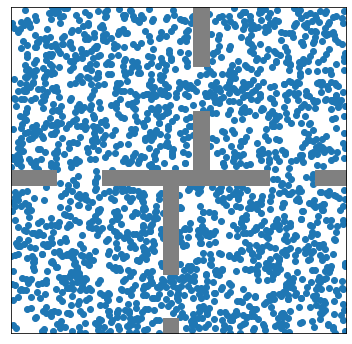

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [20]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

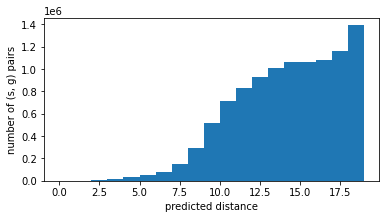

In [9]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 221 nodes and 9065 edges


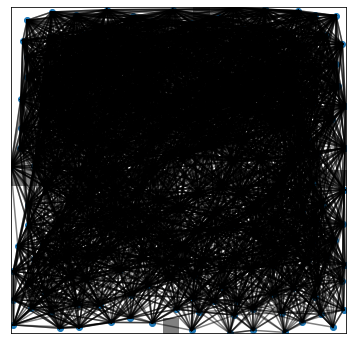

In [21]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 221 nodes and 1105 edges


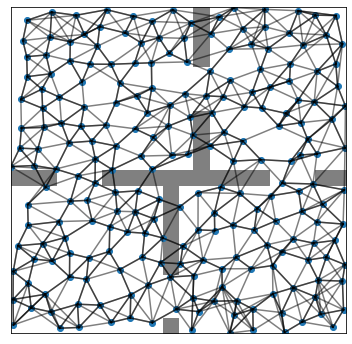

In [22]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 221 nodes and 1105 edges


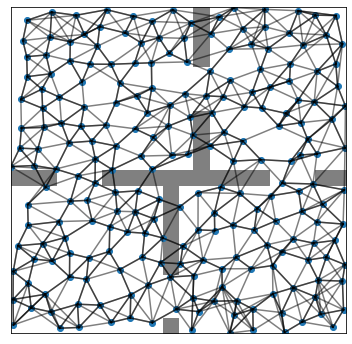

In [23]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 685 edges


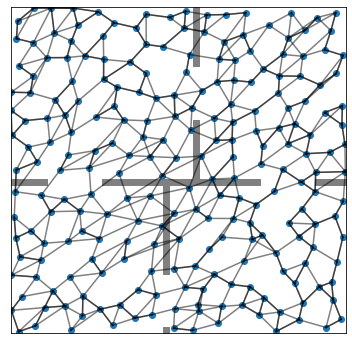

In [18]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 458 edges


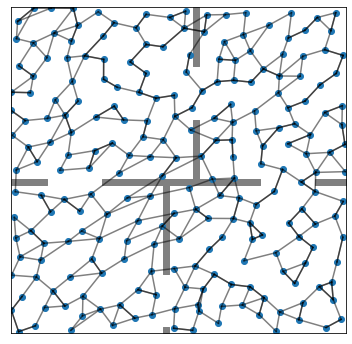

In [19]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 229 edges


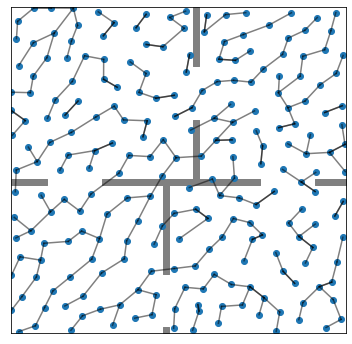

In [20]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

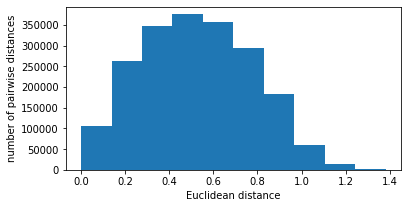

In [12]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [13]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

# Cleanup and evaluate SGM

In [14]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 10000
eval_period = 2500

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 321.28 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.25
Took 2500 cleanup steps and evaluated SGM success rate in 420.88 seconds
After filtering and 2500 cleanup steps, SGM has success rate 0.20
Took 2500 cleanup steps and evaluated SGM success rate in 419.84 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.50
Took 2500 cleanup steps and evaluated SGM success rate in 355.45 seconds
After filtering and 7500 cleanup steps, SGM has success rate 0.45
Took 2500 cleanup steps and evaluated SGM success rate in 371.80 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.75


# Load cleanup graphs

In [24]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

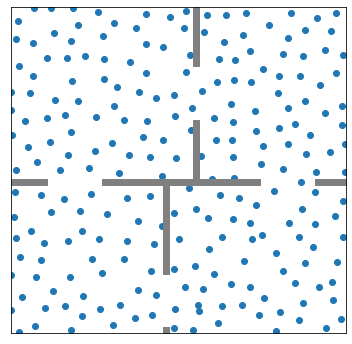

In [25]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 2330 edges


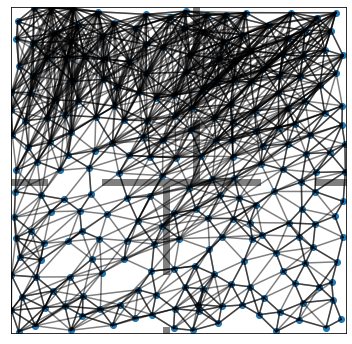

In [26]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1121 edges


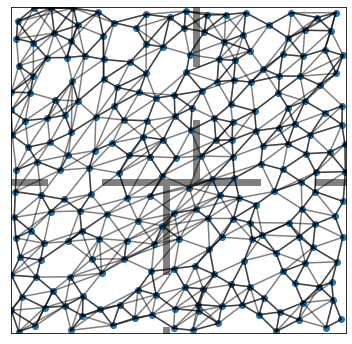

In [27]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1115 edges


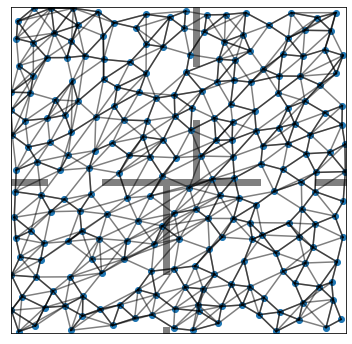

In [28]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 6 edges


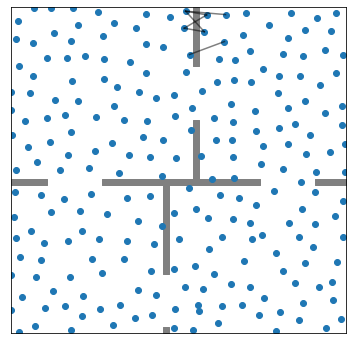

In [29]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)